In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns     
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data = pd.read_csv('E:\\materials\\Assignment\\Assignment5\\50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
df = data.drop(['State','Administration'],axis = 1)

In [7]:
df1 = df.rename({'R&D Spend':'RDSpend','Marketing Spend':'MarketingSpend'},axis =1)
df1

,RDSpend,MarketingSpend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [8]:
x =df1[['RDSpend','MarketingSpend']]

In [9]:
#building model
model = smf.ols('Profit~x',data = df1).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           2.16e-31
Time:                        03:11:26   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x[0]           0.7966      0.041     19.266      0.000       0.713       0.880
x[1]           0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Finding Cook's Distance

In [11]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([1.81512394e-04, 2.17714151e-03, 3.85030256e-02, 2.97393985e-02,
       7.43914487e-03, 8.87288175e-03, 3.60799476e-03, 4.97976353e-03,
       2.01902031e-06, 4.00294501e-03, 1.64482064e-02, 1.07062146e-02,
       1.52583172e-02, 4.10195007e-03, 6.23696501e-02, 4.28041217e-02,
       1.08143179e-02, 3.37984862e-03, 2.70426509e-03, 5.18325214e-02,
       5.68610172e-04, 8.25784837e-03, 4.13103131e-03, 3.07888695e-04,
       2.54030757e-03, 2.87274239e-03, 4.56256249e-03, 3.76461096e-02,
       4.04646886e-06, 3.84226278e-04, 1.54537882e-04, 1.49920702e-04,
       7.91098475e-04, 7.81029691e-05, 6.23157729e-03, 6.50961158e-03,
       5.60674443e-02, 5.62367665e-04, 4.68122817e-02, 5.47791686e-04,
       2.06083678e-03, 2.68539324e-03, 3.32631540e-04, 2.55928157e-02,
       2.50014790e-05, 1.17553495e-01, 7.74416953e-02, 7.99827600e-03,
       5.61942095e-02, 3.89488623e-01])

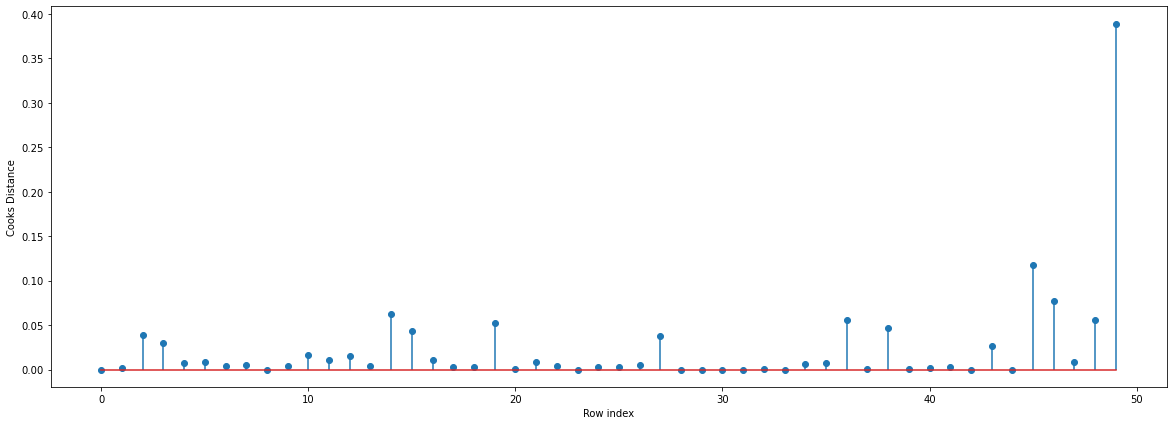

In [12]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [13]:
(np.argmax(c),np.max(c))

(49, 0.3894886227924919)

In [14]:
df2=df1.drop(df1.index[[49]],axis=0)
df2

,RDSpend,MarketingSpend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [15]:
#building the  model
model2 = smf.ols('Profit~RDSpend+MarketingSpend',data = df2).fit()

In [16]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           3.74e-33
Time:                        03:12:14   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RDSpend            0.7754      0.035     22.136      0.000       0.705       0.846
MarketingSpend     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
actual =df2.Profit
pred = model2.predict(df2)
residual = actual - pred


In [18]:
actual

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
Name: Profit, dtype: float64

In [19]:
residual

0      1319.103073
1      3748.135480
2     11093.077528
3     10655.573836
4     -3834.747457
5     -5008.285410
6     -1546.668690
7     -3952.698181
8       407.389395
9     -4027.561922
10    11025.483132
11     9560.350142
12    12162.842013
13     6258.147345
14   -17224.800777
15   -15852.571357
16     9462.440909
17    -5565.930519
18    -4753.406206
19     5983.149252
20     1365.748687
21    -7480.622939
22    -5131.959637
23    -1779.447292
24    -4830.059441
25     3692.642914
26    -6139.592740
27   -10381.339335
28     -960.810309
29    -2590.527960
30     -418.342697
31    -2127.066757
32    -2788.469933
33    -1926.225163
34     5144.054935
35     5375.174975
36    13177.474910
37      585.169015
38    10673.397237
39    -3480.101451
40     1416.531270
41     1871.857461
42     -679.541523
43     6975.563875
44    -2558.862437
45    14312.993620
46    -9468.964353
47    -7225.539847
48   -14532.156671
dtype: float64

In [20]:
residual.mean()

-2.1530894980746872e-11

In [21]:
errors_df= pd.DataFrame({"actual":actual,"prediction":pred,"errors":residual})
errors_df

,actual,prediction,errors
0,192261.83,190942.726927,1319.103073
1,191792.06,188043.924520,3748.135480
2,191050.39,179957.312472,11093.077528
3,182901.99,172246.416164,10655.573836
4,166187.94,170022.687457,-3834.747457
5,156991.12,161999.405410,-5008.285410
6,156122.51,157669.178690,-1546.668690
7,155752.60,159705.298181,-3952.698181
8,152211.77,151804.380605,407.389395
9,149759.96,153787.521922,-4027.561922


In [22]:
#new data for prediction
new_data=pd.DataFrame({'RDSpend':2000,'MarketingSpend':4000},index=[1])

In [23]:
model2.predict(new_data)

1    51445.819617
dtype: float64